In [5]:
using Markdown
using InteractiveUtils

In [6]:
using Pkg
Pkg.activate("/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis")
using PyPlot
using PyCall
using Base64
using Printf
using NCDatasets
using Statistics
using AvailablePotentialEnergyFramework
using JLD

 Activating environment at `/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/Project.toml`


In [7]:
function filter_n_times(x,smooth_time,n)
	if n <= 1
		return filter_array_time(x,smooth_time,3)
	else
        for ii in n:-1:1
 	          x=filter_array_time(x,smooth_time,3)
         end
	end
           x
end

filter_n_times (generic function with 1 method)

In [8]:
tkr = pyimport("matplotlib.ticker")# import FormatStrFormatter

PyObject <module 'matplotlib.ticker' from '/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/matplotlib/ticker.py'>

In [9]:
data_dir = "$(ENV["SCRATCH"])/for_postprocessing/largencfiles/"
output_dir = "/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/plotsandanimations/"

"/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/plotsandanimations/"

In [30]:
function get_timeseries!(buf1,buf2,file_path)
 	mean_qrad = Dataset(file_path) do ds
        mean_qrad = Array{Float32,2}(undef,80,1200);
        for timeind in 1:1200
            NCDatasets.load!(ds["QRAD"].var,buf1,1:512,1:512,1:80,timeind:timeind)
            mean_qrad[:,timeind] .= mean!(buf2,buf1)[:]
        end
        mean_qrad
    end
    mean_qrad
end

get_timeseries! (generic function with 2 methods)

In [31]:
buf1_large = Array{Float32,3}(undef,512,512,80)
buf2_large = Array{Float32,3}(undef,1,1,80);

In [32]:
qrad_control = get_timeseries!(buf1_large,buf2_large,joinpath(data_dir,"f5e-4_2km_1000km_control_3d.nc"))

80×1200 Array{Float32,2}:
   2.78919      2.53988      2.59841    …  -1.95748   -1.94073   -1.96433
   0.358207     0.354503     0.459952      -2.02502   -2.00391   -2.0314
   2.38192      2.16599      2.19526       -1.44439   -1.42219   -1.44606
   1.27683      1.02033      1.07209       -1.47139   -1.45382   -1.47138
  -0.600355     0.743578     0.770846      -1.50113   -1.48481   -1.49514
  -1.51907      0.562584     0.576837   …  -1.52205   -1.50028   -1.5187
  -4.7686       0.300341     0.510495      -1.58565   -1.58124   -1.59223
 -14.0013      -0.371036     0.482572      -1.69124   -1.67321   -1.68743
  -3.15472    -12.904        0.657487      -1.79965   -1.78727   -1.77719
  -1.12414    -14.7128      -5.22494       -1.89089   -1.89209   -1.87949
  -1.23595     -1.72892    -32.0399     …  -1.94359   -1.98366   -1.93434
  -1.30911     -1.53173     -4.20728       -1.95087   -1.99319   -1.94325
  -1.34415     -1.4431      -1.85891       -1.91738   -1.95357   -1.89476
   ⋮          

In [34]:
qrad_control = get_timeseries!(buf1_large,buf2_large,joinpath(data_dir,"f5e-4_2km_1000km_control_3d.nc"))
qrad_homoRad = get_timeseries!(buf1_large,buf2_large,joinpath(data_dir,"f5e-4_2km_1000km_homoRad_3d.nc"))
qrad_homoSfc = get_timeseries!(buf1_large,buf2_large,joinpath(data_dir,"f5e-4_2km_1000km_homoSfc_3d.nc"))
qrad_homoAll = get_timeseries!(buf1_large,buf2_large,joinpath(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_3d.nc"))

80×1200 Array{Float32,2}:
   2.74529      2.41167      2.36912   …  -1.73652   -1.71052   -1.69373
   0.313235     0.224155     0.264412     -1.89711   -1.883     -1.87658
   2.34503      2.02038      1.96162      -1.32868   -1.31467   -1.31577
   1.23575      0.883432     0.864043     -1.41096   -1.40746   -1.39646
  -0.0242407    0.596275     0.557372     -1.47669   -1.47507   -1.47295
  -0.984719     0.429556     0.367789  …  -1.49461   -1.5017    -1.49756
  -2.50533      0.325093     0.30866      -1.52356   -1.53101   -1.53099
 -13.4573       0.281771     0.353924     -1.58794   -1.59584   -1.58293
  -5.7001      -3.86192      0.809565     -1.63439   -1.6397    -1.65733
  -1.13165    -19.9624       1.33574      -1.70149   -1.69846   -1.69598
  -1.23682     -2.24224    -25.8809    …  -1.73792   -1.74322   -1.76182
  -1.30447     -1.57389     -9.87714      -1.74448   -1.75971   -1.77232
  -1.34528     -1.46797     -2.0202       -1.72924   -1.71843   -1.73175
   ⋮                     

In [53]:
tropopause_control = [z[findmin(abs.(qrad_control[1:50,t]))[2]] for t in 1:1200]
tropopause_homoRad = [z[findmin(abs.(qrad_homoRad[1:50,t]))[2]] for t in 1:1200]
tropopause_homoSfc = [z[findmin(abs.(qrad_homoSfc[1:50,t]))[2]] for t in 1:1200]
tropopause_homoAll = [z[findmin(abs.(qrad_homoAll[1:50,t]))[2]] for t in 1:1200];

In [56]:
z = Dataset(joinpath(data_dir,"f5e-4_2km_1000km_control_3d.nc")) do ds
	variable(ds,"z")[:]
    end
times = Dataset(joinpath(data_dir,"f5e-4_2km_1000km_control_3d.nc")) do ds
	variable(ds,"time")[:]
    end

1200-element Array{Float32,1}:
   0.08333
   0.16667
   0.25
   0.33333
   0.41667
   0.5
   0.58333
   0.66667
   0.75
   0.83333
   0.91667
   1.0
   1.08333
   ⋮
  99.08334
  99.16666
  99.25
  99.33334
  99.41666
  99.5
  99.58334
  99.66666
  99.75
  99.83334
  99.91666
 100.0

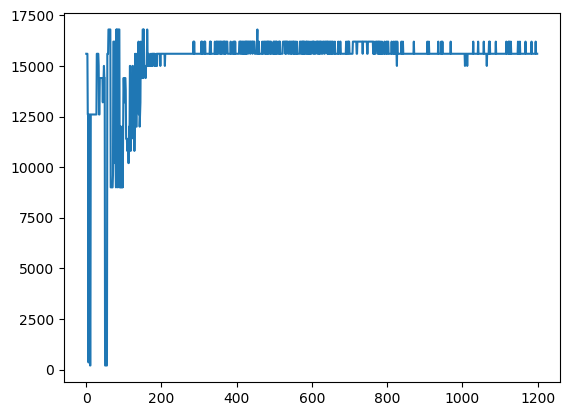

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x2aab2a02fbd0>

In [54]:
plot(tropopause_control)

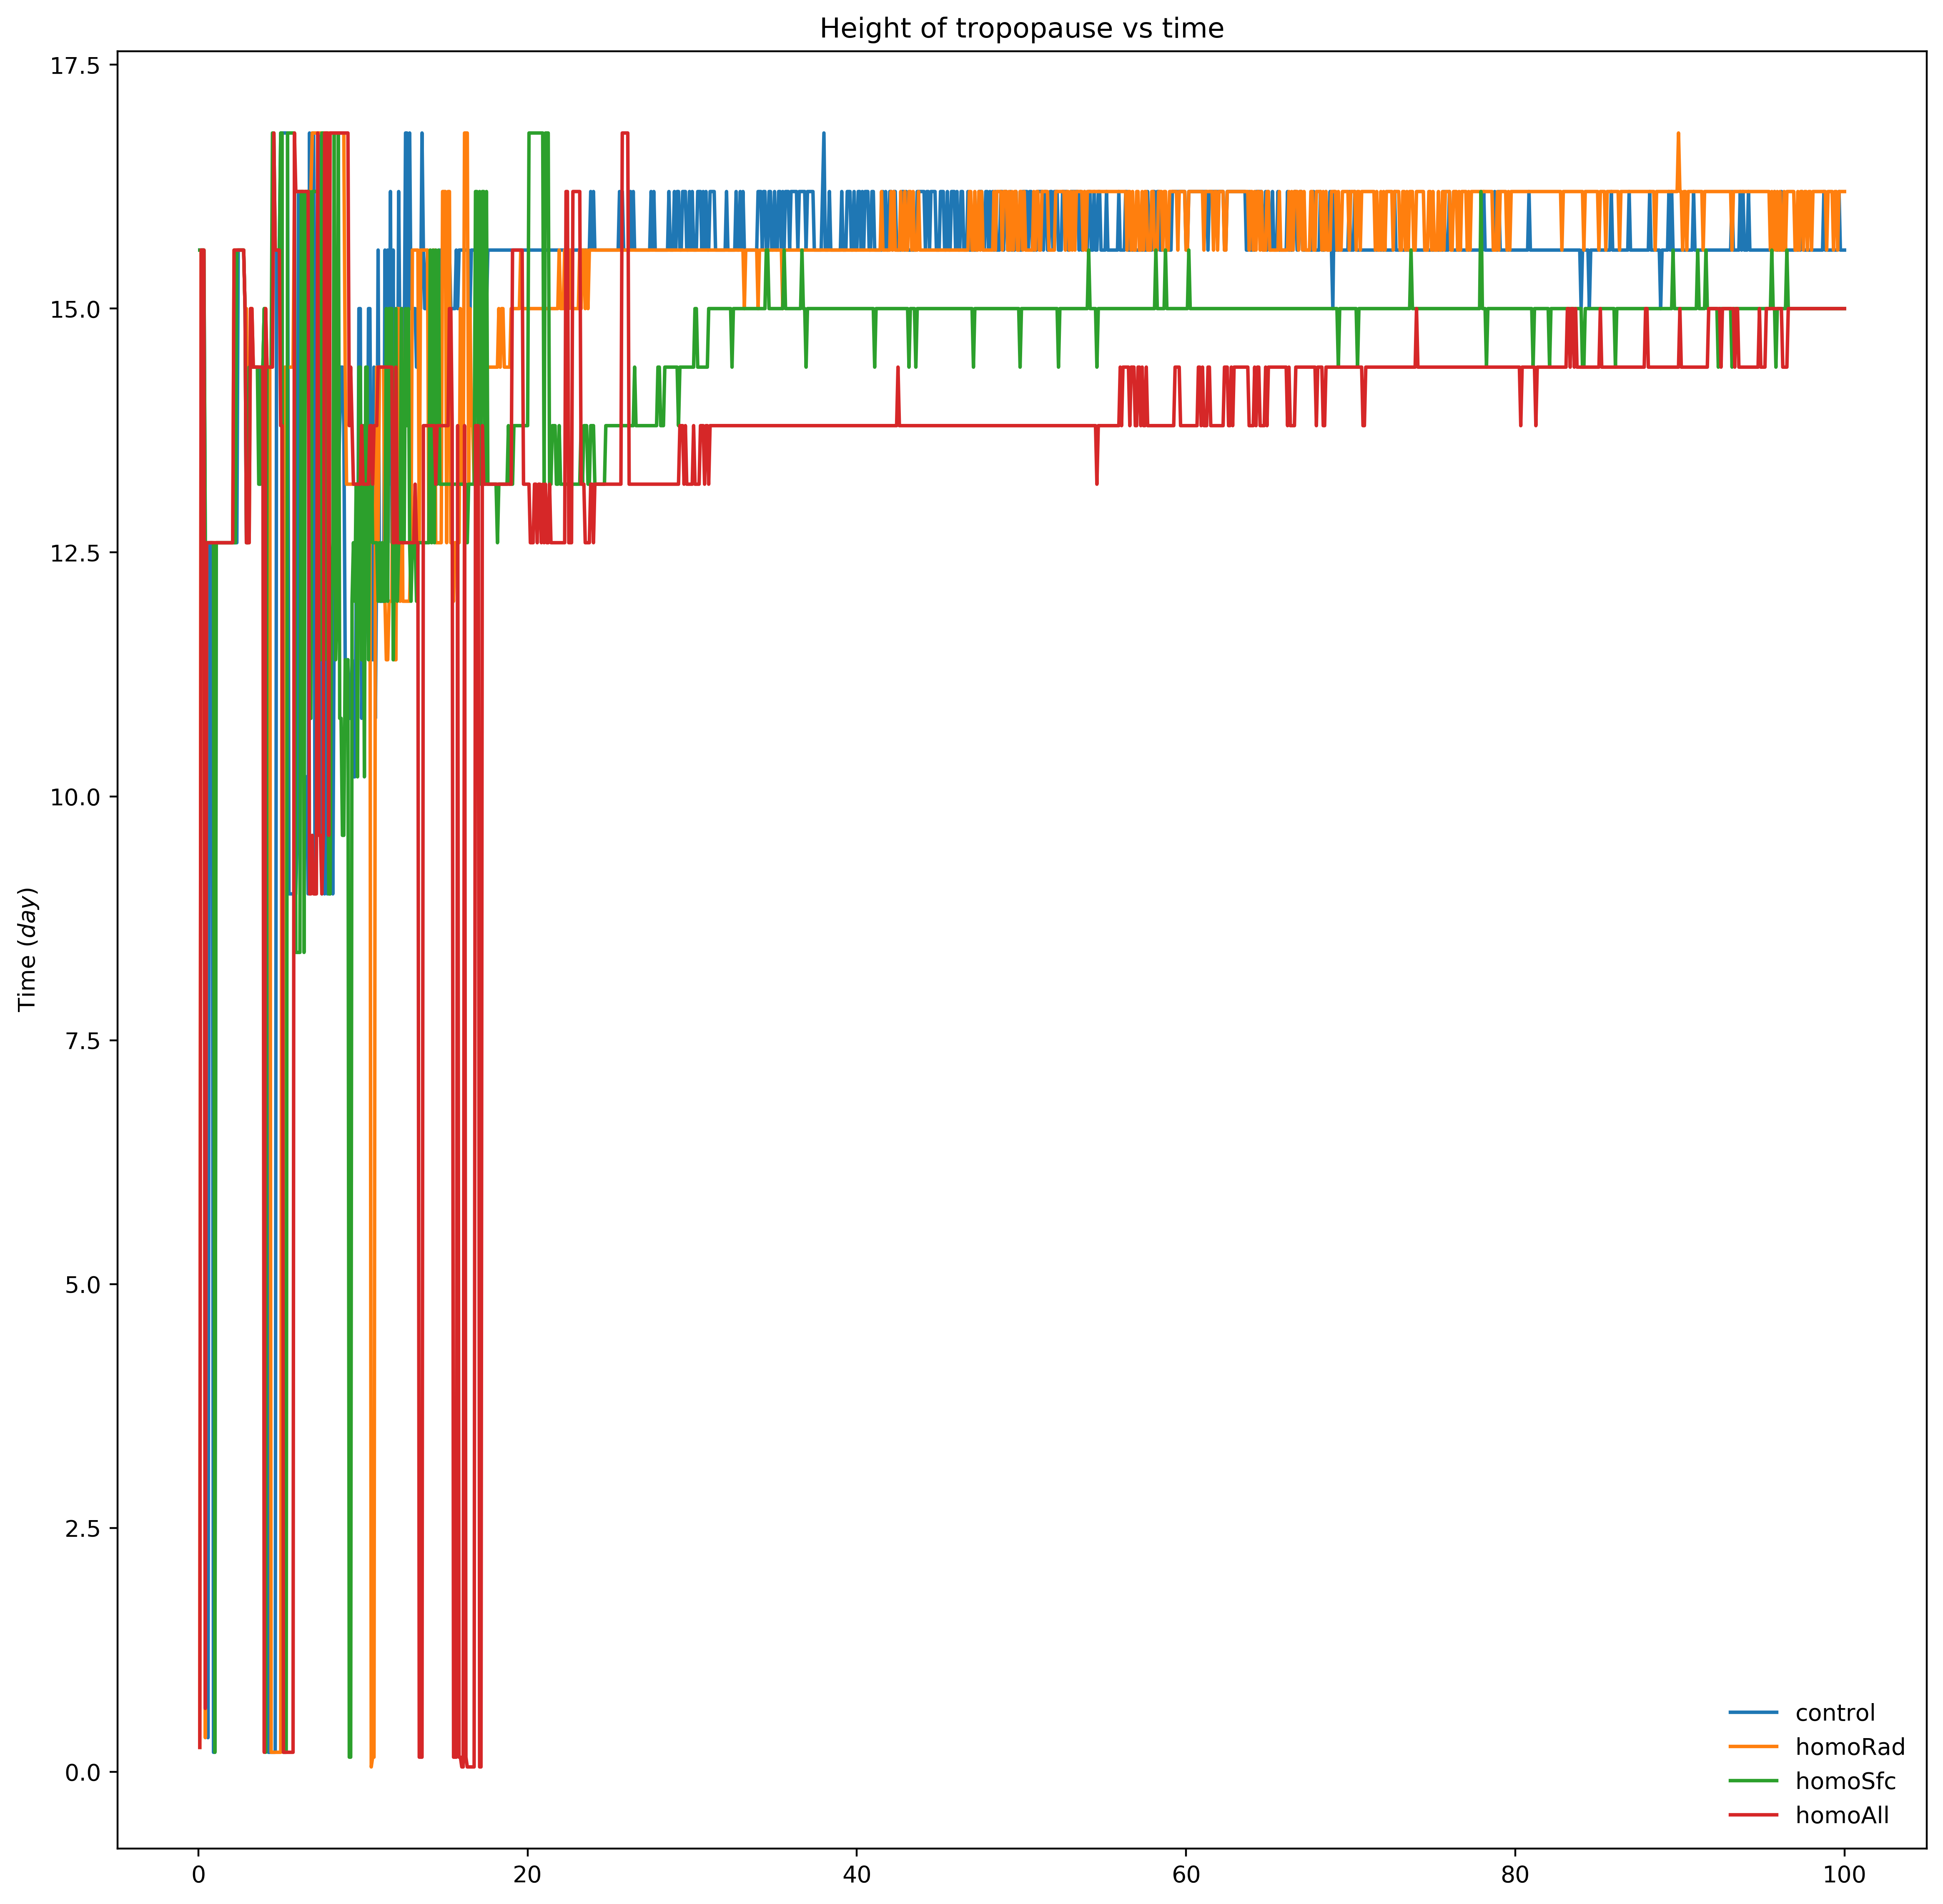

PyObject Text(0.5, 1, 'Height of tropopause vs time')

In [67]:
fig, ax = plt.subplots(1,sharex=true,figsize=(14,14),dpi=400)
ax.plot(times,1e-3tropopause_control,label = "control")
ax.plot(times,1e-3tropopause_homoRad,label = "homoRad")
ax.plot(times,1e-3tropopause_homoSfc,label = "homoSfc")
ax.plot(times,1e-3tropopause_homoAll,label = "homoAll")
ax.legend(ncol=1 ,frameon=false)
ax.set_ylabel(string("height of min(QRAD) ", L"(km)"))
ax.set_ylabel(string("Time ", L"(day)"))
ax.set_title("Height of tropopause vs time")

In [110]:
@show mean(tropopause_control[end-480:end])
@show mean(tropopause_homoRad[end-480:end])
@show mean(tropopause_homoSfc[end-480:end])
@show mean(tropopause_homoAll[end-480:end])

mean(tropopause_control[end - 480:end]) = 15698.545f0
mean(tropopause_homoRad[end - 480:end]) = 16066.528f0
mean(tropopause_homoSfc[end - 480:end]) = 14997.505f0
mean(tropopause_homoAll[end - 480:end]) = 14446.154f0


14446.154f0

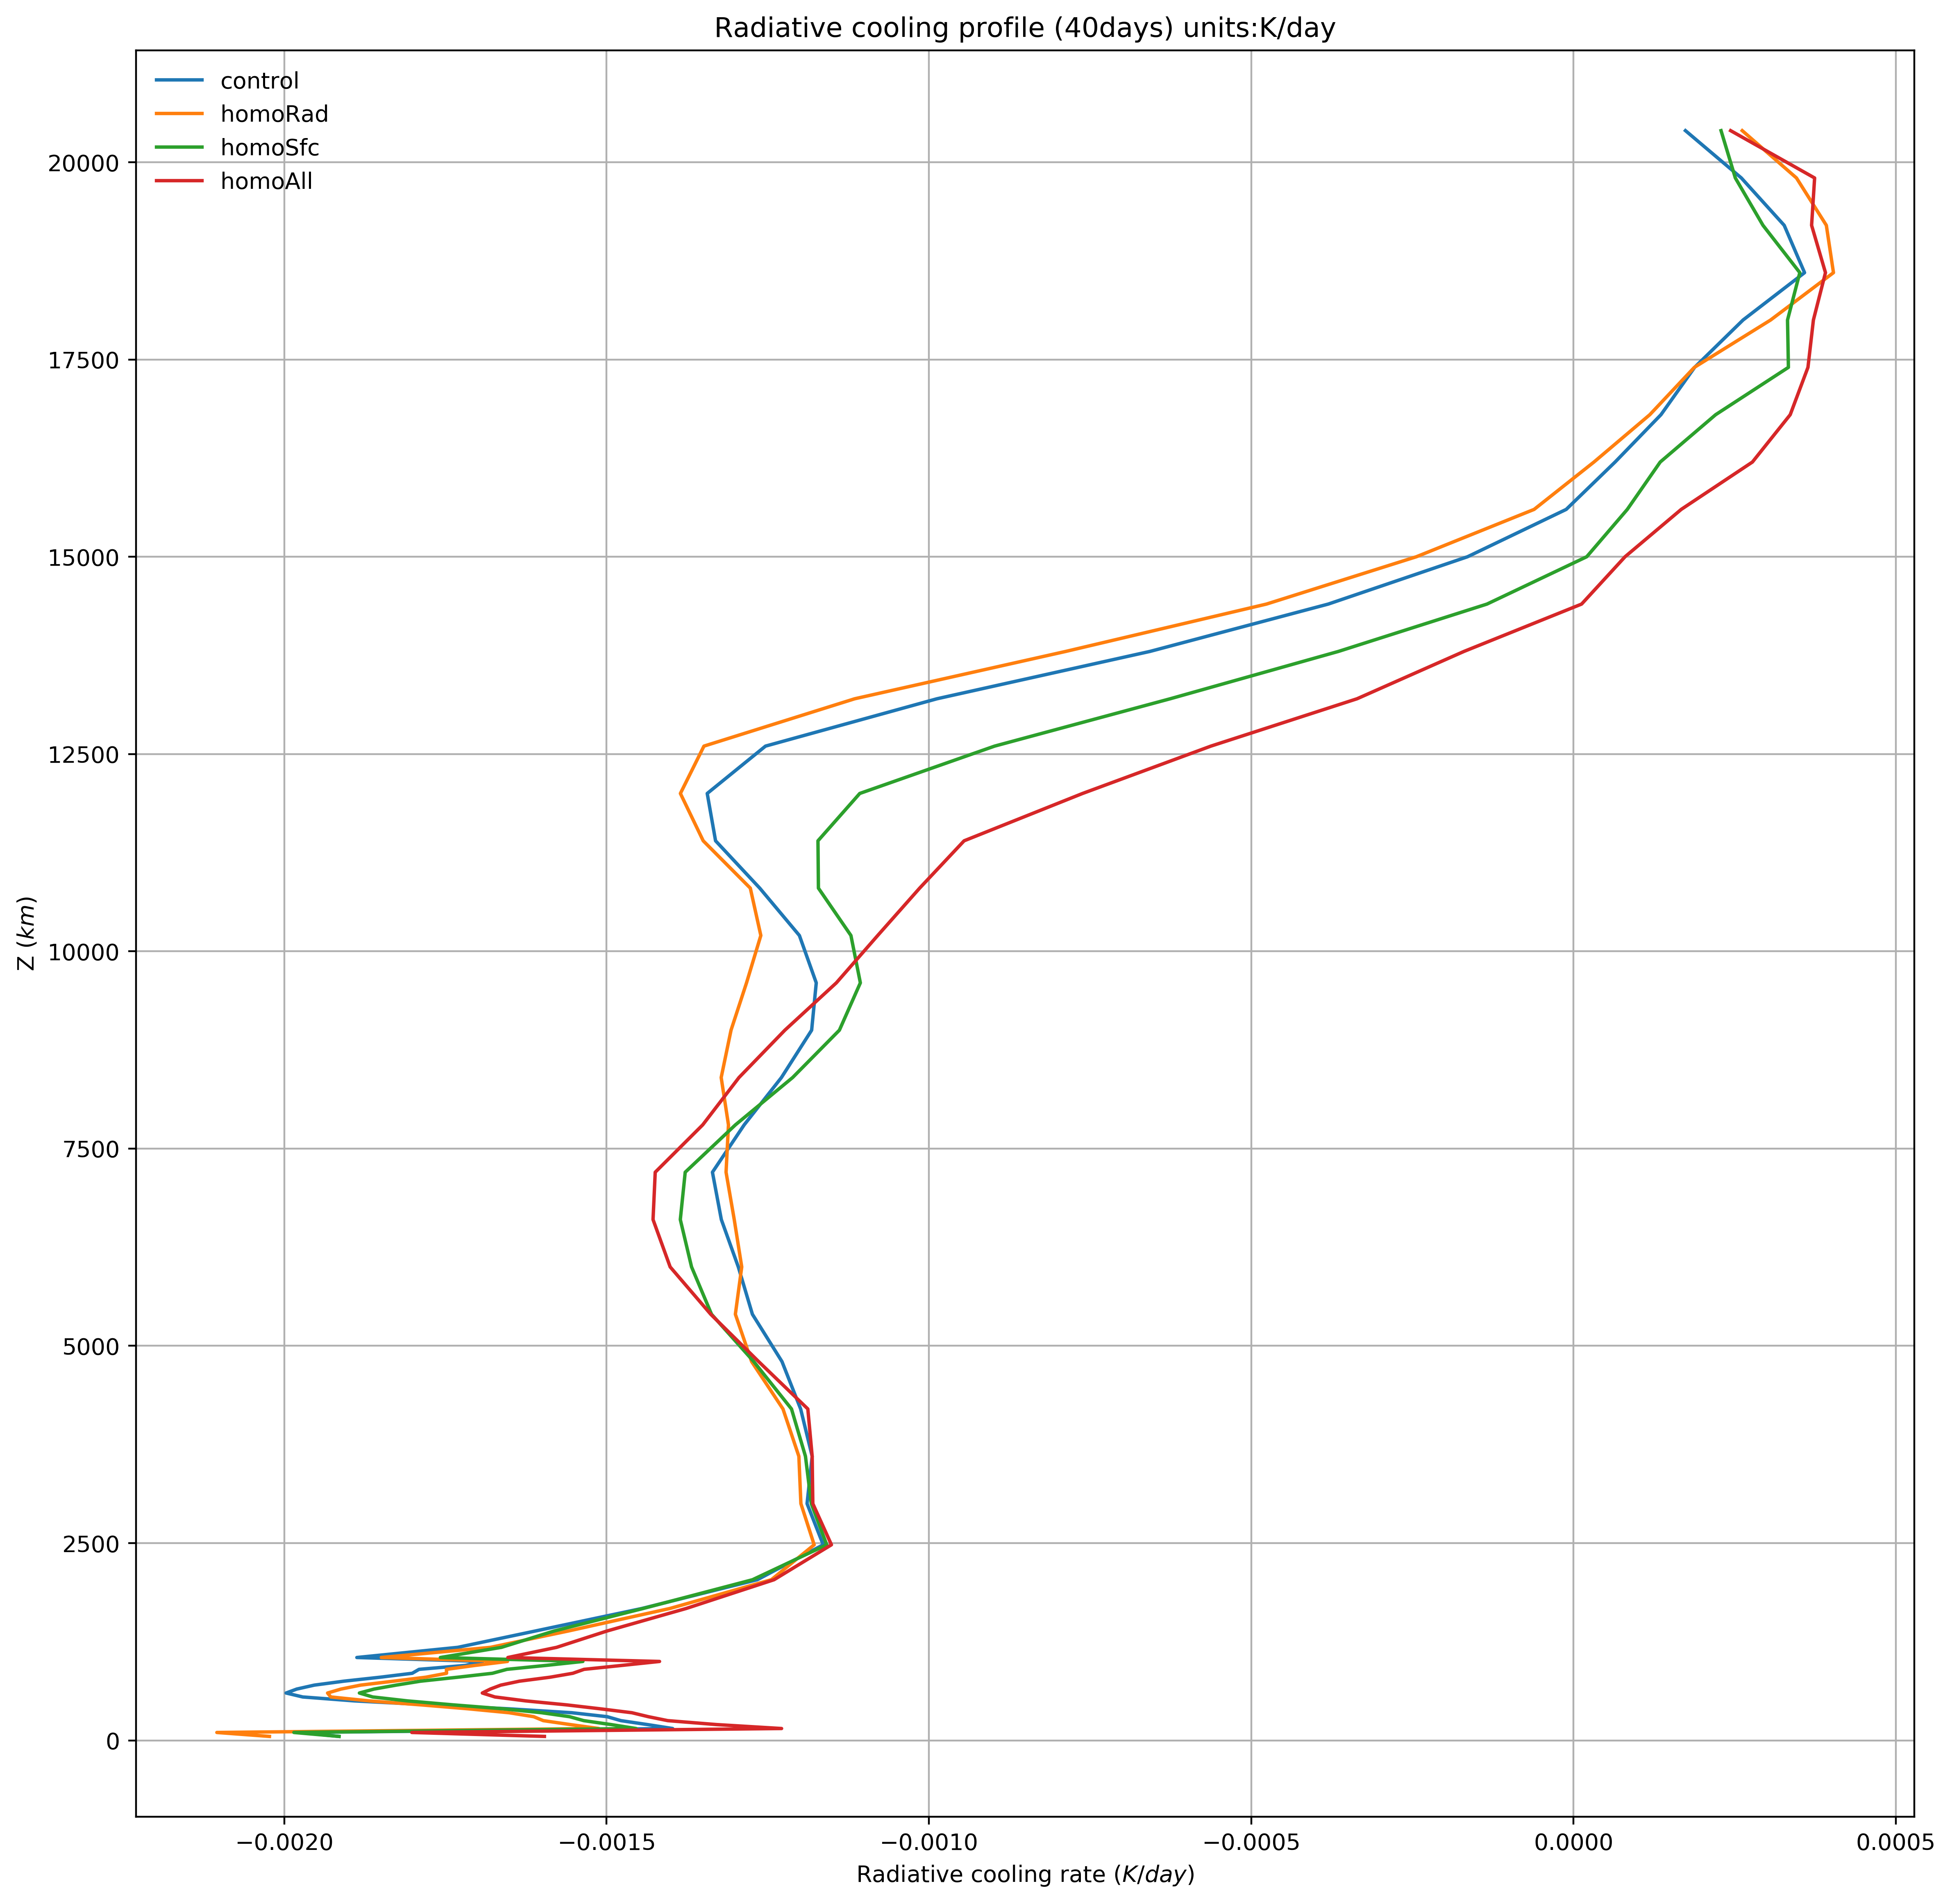

PyObject Text(0.5, 1, 'Radiative cooling profile (40days) units:K/day')

In [107]:
fig, ax = plt.subplots(1,sharex=true,figsize=(14,14),dpi=400)
ax.plot(1e-3mean(qrad_control[1:56,end-480:end],dims=2),z[1:56],label = "control")
ax.plot(1e-3mean(qrad_homoRad[1:56,end-480:end],dims=2),z[1:56],label = "homoRad")
ax.plot(1e-3mean(qrad_homoSfc[1:56,end-480:end],dims=2),z[1:56],label = "homoSfc")
ax.plot(1e-3mean(qrad_homoAll[1:56,end-480:end],dims=2),z[1:56],label = "homoAll")
ax.legend(ncol=1 ,frameon=false)
plt.grid()
ax.set_xlabel(string("Radiative cooling rate ", L"(K/day)"))
ax.set_ylabel(string("Z ", L"(km)"))
ax.set_title("Radiative cooling profile (40days) units:K/day")

In [79]:
function meshgrid(x, y)
    X = [i for i in x, j in 1:length(y)]
    Y = [j for i in 1:length(x), j in y]
    return X, Y
end
Z,T = meshgrid(z[1:56],times[end-480:end])

(Float32[50.0 50.0 … 50.0 50.0; 100.0 100.0 … 100.0 100.0; … ; 19800.0 19800.0 … 19800.0 19800.0; 20400.0 20400.0 … 20400.0 20400.0], Float32[60.0 60.08333 … 99.91666 100.0; 60.0 60.08333 … 99.91666 100.0; … ; 60.0 60.08333 … 99.91666 100.0; 60.0 60.08333 … 99.91666 100.0])

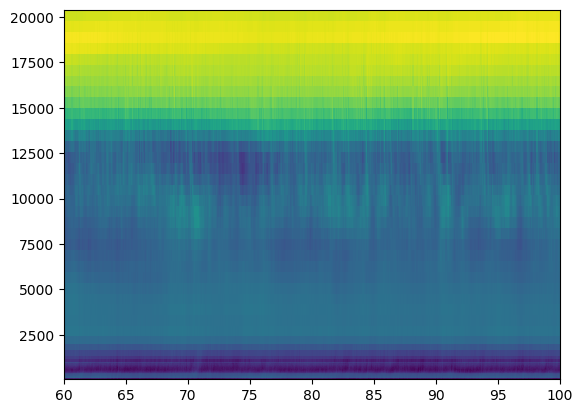

PyObject <matplotlib.collections.QuadMesh object at 0x2aab2ace93d0>

In [80]:
pcolormesh(T,Z,qrad_control[1:56,end-480:end])

In [81]:
z_iter = 1:56

1:56

In [85]:
minimum(qrad_control[z_iter,end-480:end])

-2.1365235f0

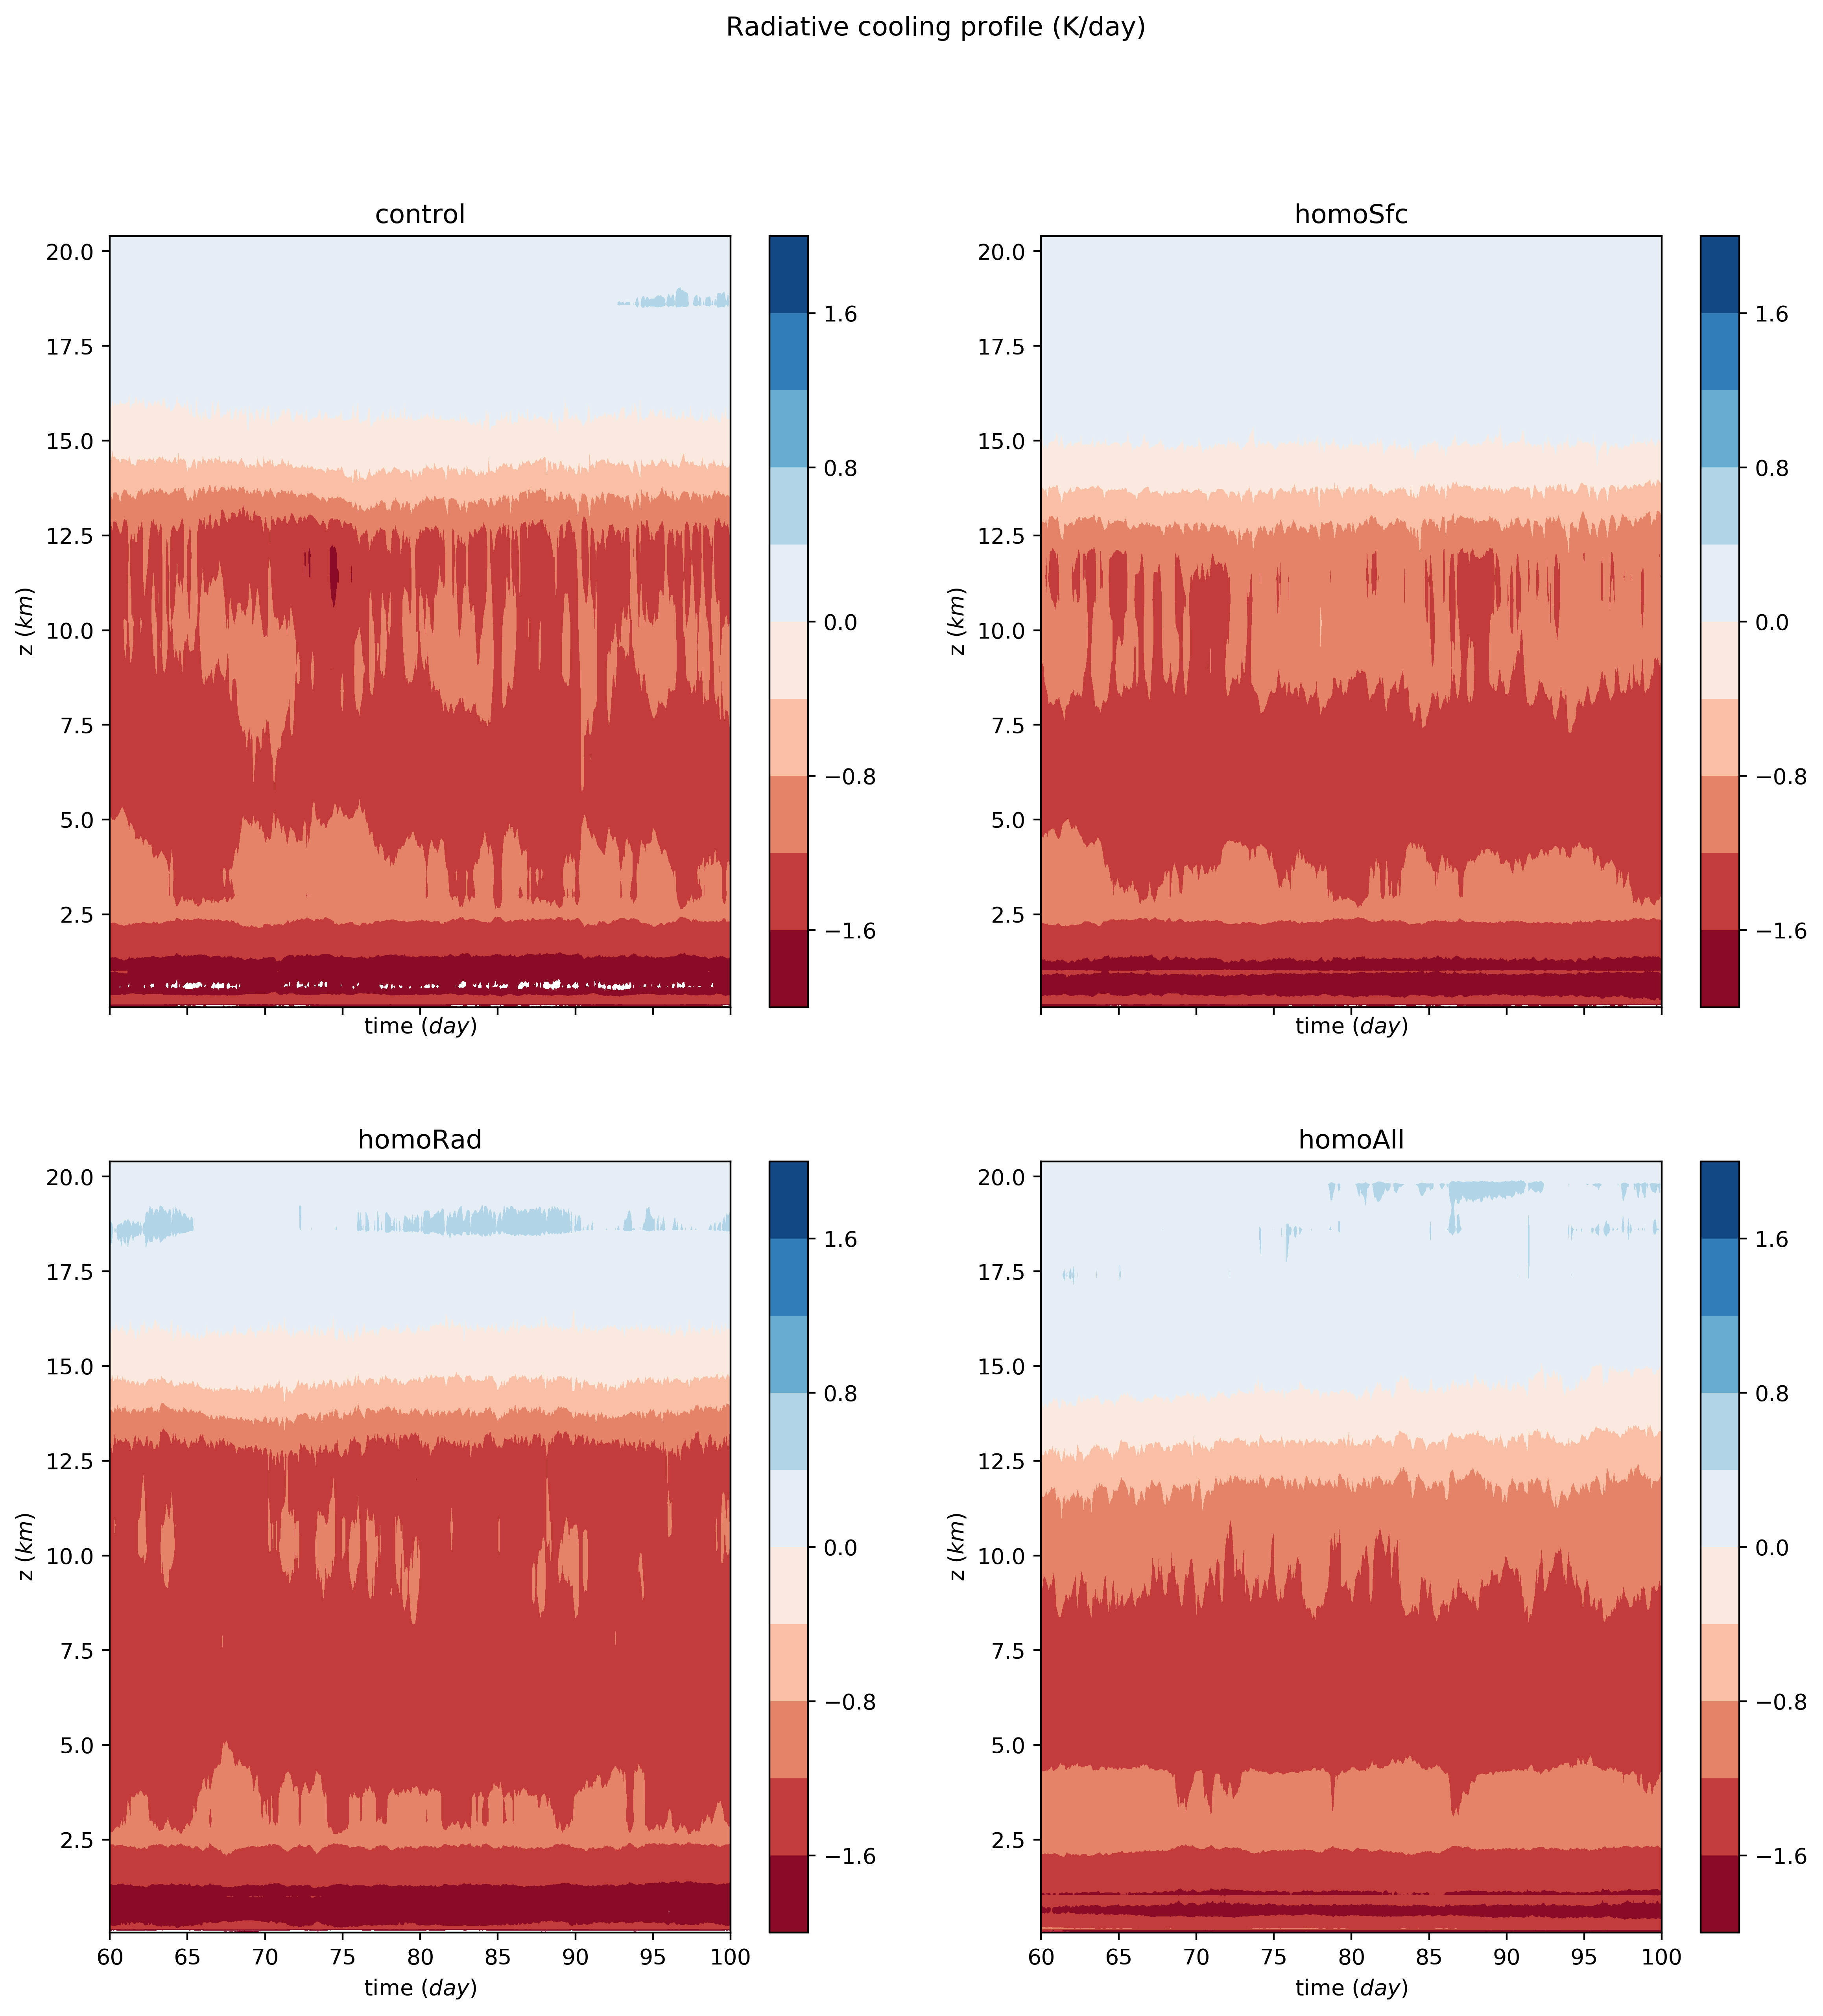

4-element Array{PyObject,1}:
 PyObject Text(0.5, 2541.888888888889, 'time $(day)$')
 PyObject Text(0.5, 97.00000000000009, 'time $(day)$')
 PyObject Text(0.5, 2541.888888888889, 'time $(day)$')
 PyObject Text(0.5, 97.00000000000009, 'time $(day)$')

In [100]:
fig, ax = plt.subplots(2,2,sharex=true,figsize=(14,14),dpi=400)
levels = collect(range(-2,stop=2,length=11))
ax[1].contourf(T,1e-3Z,qrad_control[z_iter,end-480:end],levels = levels,cmap="RdBu")#,title="control")
ax[2].contourf(T,1e-3Z,qrad_homoRad[z_iter,end-480:end],levels = levels,cmap="RdBu")#,title="homoRad")
ax[3].contourf(T,1e-3Z,qrad_homoSfc[z_iter,end-480:end],levels = levels,cmap="RdBu")#,title="homoSfc")
cf = ax[4].contourf(T,1e-3Z,qrad_homoAll[z_iter,end-480:end],levels = levels,cmap="RdBu")#,title="homoAll")
#                  y[:-1, :-1] + dy/2., z, levels=levels,
#                   cmap=cmap)
fig.colorbar(cf, ax=ax[1])
fig.colorbar(cf, ax=ax[2])
fig.colorbar(cf, ax=ax[3])
fig.colorbar(cf, ax=ax[4])
ax[1].set_title("control")
ax[2].set_title("homoRad")
ax[3].set_title("homoSfc")
ax[4].set_title("homoAll")
fig.suptitle("Radiative cooling profile (K/day)")
[ax[i].set_ylabel(string("z ", L"(km)")) for i in 1:4]
[ax[i].set_xlabel(string("time ", L"(day)")) for i in 1:4]
#tight_layout()
#ax.set_ylabel(string("Time ", L"(day)"))
#ax.set_title("Height of tropopause vs time")